<a href="https://colab.research.google.com/github/JasferI/EXPLORATORY-DATA-ANALYSIS/blob/main/giniindex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/jobplacement.csv")

In [ ]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
for col in df.columns:
  df[col] =  label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,46,1,93,1,1,14,2,0,9,1,64,1
1,1,82,0,79,1,2,74,2,1,74,0,153,1
2,1,42,0,51,0,0,27,0,0,55,0,50,1
3,1,22,0,14,0,2,3,2,0,37,1,72,0
4,1,98,0,70,0,1,65,0,0,96,0,28,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gender               215 non-null    int64
 1   ssc_percentage       215 non-null    int64
 2   ssc_board            215 non-null    int64
 3   hsc_percentage       215 non-null    int64
 4   hsc_board            215 non-null    int64
 5   hsc_subject          215 non-null    int64
 6   degree_percentage    215 non-null    int64
 7   undergrad_degree     215 non-null    int64
 8   work_experience      215 non-null    int64
 9   emp_test_percentage  215 non-null    int64
 10  specialisation       215 non-null    int64
 11  mba_percent          215 non-null    int64
 12  status               215 non-null    int64
dtypes: int64(13)
memory usage: 22.0 KB


In [ ]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

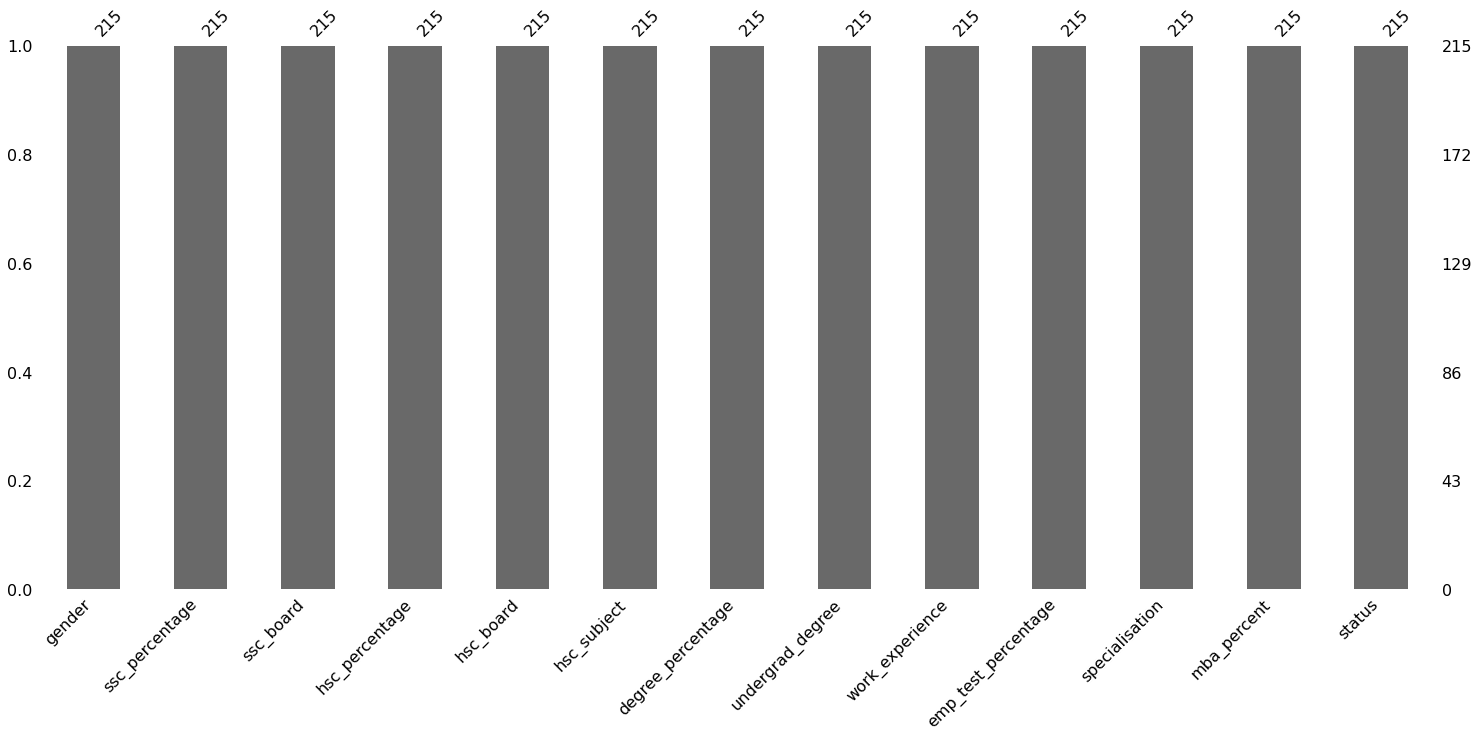

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
x = df.drop('status', axis = 1)
y = df['status']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=0)

In [ ]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion = "gini",random_state=100)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[24, 10],
       [17, 57]])

In [ ]:
accuracy_score(y_test, y_pred)

0.75

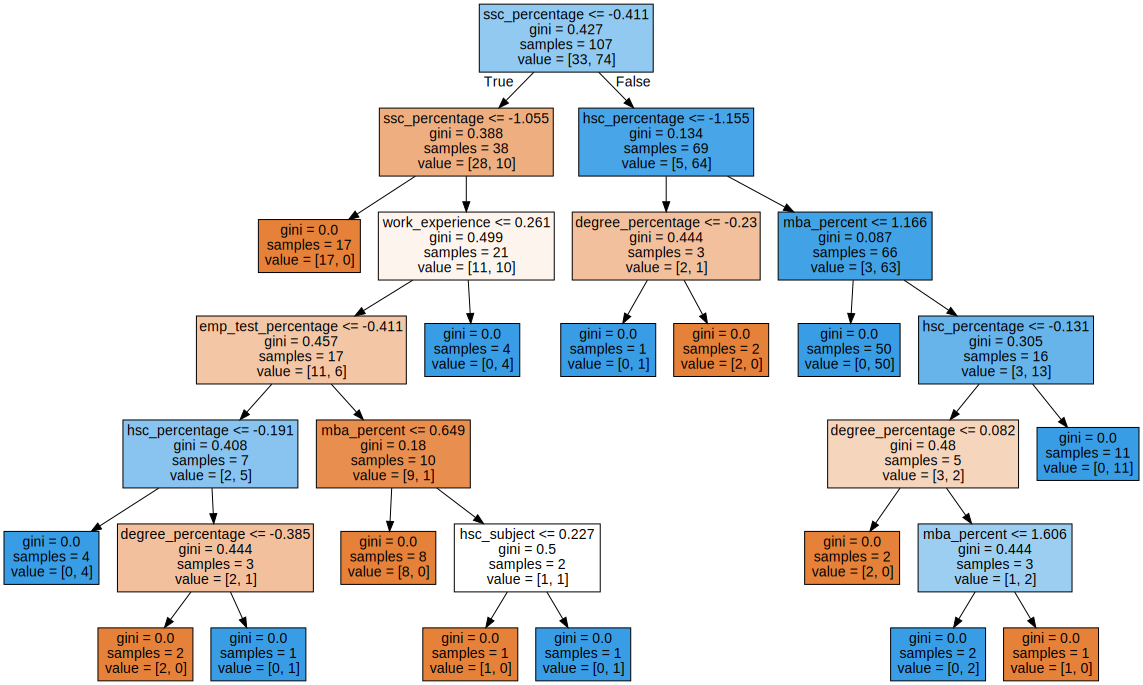

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names = x.columns,filled=True,))


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:


from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

model = LinearRegression()

mse, bias, var = bias_variance_decomp(model, x_train, y_train, x_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

TypeError: ignored